# Pulse intervals analysis (FS2011, J614)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import struct

In [18]:
path = '.'
cps_per_uSvH = 68.4 / 60
f_clk = 8000000

## Load data

In [22]:
# Load data
intervals = []
interval_files = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('pulseinterval-data.bin')]
for interval_file in interval_files:
    interval_data = open(interval_file, 'rb').read()
    for i in range(0, len(interval_data), 4):
        value = struct.unpack(">I", interval_data[i:i + 4])[0] / f_clk
        intervals.append(value)

intervals = np.array(intervals)

## Radiation rate

In [23]:
# Generate samples from intervals
x = [0]
time = 0
for interval in intervals:
    time += interval
    while time > 1:
        x.append(0)
        time -= 1
    x[-1] += 1

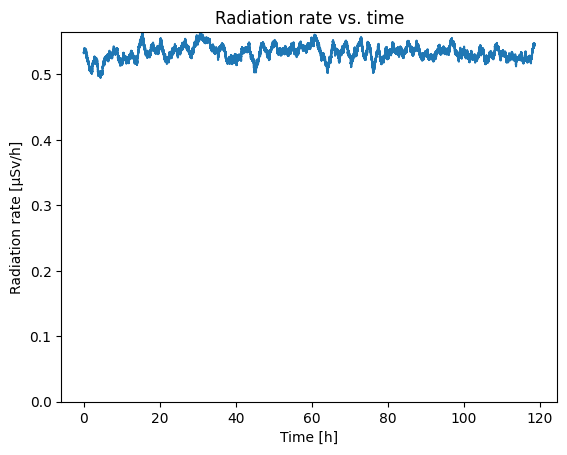

In [24]:
# Moving average filter
N = 5000

x_filt = np.convolve(x, np.ones(N) / N, mode='valid') / cps_per_uSvH
t = np.linspace(0, len(x_filt) / 3600, num=len(x_filt))

# Plot
plt.plot(t, x_filt)
plt.ylim(0, max(x_filt))
plt.xlabel('Time [h]')
plt.ylabel('Radiation rate [µSv/h]')
plt.title('Radiation rate vs. time')
plt.show()

## Pulse interval probability density function

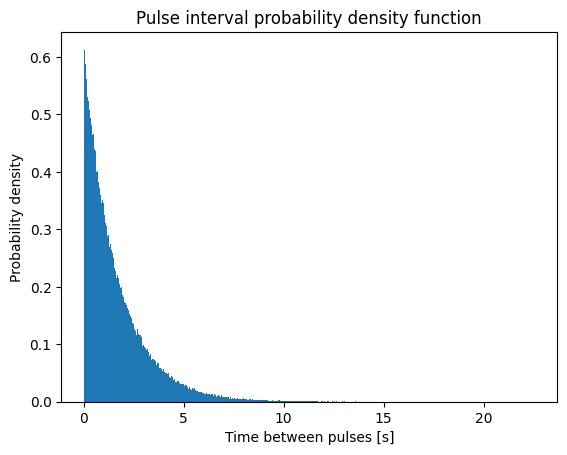

In [25]:
# Plot
plt.hist(intervals, 500, density=True)
plt.xlabel('Time between pulses [s]')
plt.ylabel('Probability density')
plt.title('Pulse interval probability density function')
plt.show()

## Dead-time

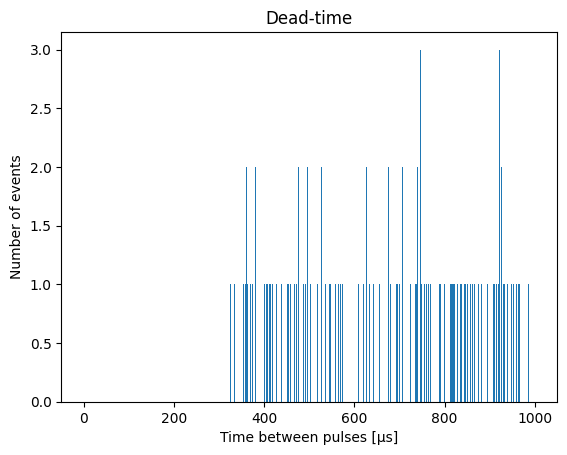

In [40]:
# Plot
plt.hist(1E6 * intervals, 500, range=[0, 1000])
plt.xlabel('Time between pulses [µs]')
plt.ylabel('Number of events')
plt.title('Dead-time')
plt.show()